In [12]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
sns.set_style("ticks")

In [4]:
river='Detroit_R'

location = (42.157726, -83.125258)

In [5]:
detroit_nurients = pd.read_excel('../../measurements/ECCC/Detroit River/Copy of DetroitRiver_ECCC_WQ2014-15.xlsx')



In [37]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN samples.zip').open(name='result.csv'))
usgs_stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN stations.zip').open(name='station.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
# usgs_stations = usgs_stations[['MonitoringLocationIdentifier', 'LatitudeMeasure', 'LongitudeMeasure']]
usgs_stations = usgs_stations.rename(index=str, columns={'MonitoringLocationIdentifier':'STATION', 'LatitudeMeasure':'Latitude'.upper(), 'LongitudeMeasure':'Longitude'.upper()})
near_usgs_stations = usgs_stations[(usgs_stations.LATITUDE>location[0]-delta) & (usgs_stations.LATITUDE<location[0]+delta) &
                     (usgs_stations.LONGITUDE>location[1]-delta) & (usgs_stations.LONGITUDE<location[1]+delta)]

In [50]:


WSC_STATIONS = pd.read_pickle('data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

PWQMN = pd.read_pickle('data/PWQMN')

elem = 'PHOSPHORUS,UNFILTERED TOTAL'
PWQMN = PWQMN[PWQMN["PARM DESCRIPTION"]==elem]
PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000

PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

elem_name='Phosphorus total'

GLNI = GLNI[GLNI.VariableCommonName==elem_name]

GLNI.SiteName.unique()

delta = 0.5


eccc_name = 'Phosphorus total'
eccc_stations = detroit_nurients[detroit_nurients.VariableCommonName == eccc_name][['SiteCode','Latitude','Longitude']]
eccc_stations = eccc_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})

near_eccc_stations = eccc_stations[(eccc_stations.LATITUDE>location[0]-delta) & (eccc_stations.LATITUDE<location[0]+delta) &
                     (eccc_stations.LONGITUDE>location[1]-delta) & (eccc_stations.LONGITUDE<location[1]+delta)]


near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
                     (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]



near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
                     (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
                     (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


PWQMN_IDS = [[st, False] for st in set(PWQMN.STATION.unique()).intersection(near_pwqmn_stations.STATION.unique())]

all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

all_near_stations = pd.concat([near_stations, near_eccc_stations, near_pwqmn_stations, near_glni_stations, near_usgs_stations])



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [52]:
PWQMN_IDS = [[st, False] for st in near_pwqmn_stations.STATION.unique()]
GLNI_IDS = [[st, False] for st in near_glni_stations.STATION.unique()]
Flow_IDS = [[st, False] for st in near_stations.STATION.unique()]
ECCC_IDS = [[st, False] for st in near_eccc_stations.STATION.unique()]
USGS_IDS = [[st, False] for st in near_usgs_stations.STATION.unique()]

In [147]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=9.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all Flow
# for index, st_dic in enumerate(Flow_IDS):
#     st = st_dic[0]
# #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# #     if N>10:
#     st_df = near_stations[near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=st_df.STATION.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)



# # show all
if 0:
    for index, st_dic in enumerate(PWQMN_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_pwqmn_stations[near_pwqmn_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
                     ).add_to(m)
    for index, st_dic in enumerate(GLNI_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_glni_stations[near_glni_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='green')
                     ).add_to(m)
    for index, st_dic in enumerate(Flow_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_stations[near_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='red')
                     ).add_to(m)
    for index, st_dic in enumerate(ECCC_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_eccc_stations[near_eccc_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='blue')
                     ).add_to(m)
        
    for index, st_dic in enumerate(USGS_IDS):
        st = st_dic[0]
    # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
    # #     if N>10:
        st_df = near_usgs_stations[near_usgs_stations.STATION == st]
        folium.Marker(location=[st_df.LATITUDE.values[0], 
                                st_df.LONGITUDE.values[0]], 
                                  popup=folium.Popup(html=str(st_df.STATION.values[0]),
                                show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='orange')
                     ).add_to(m)
else:
    Show_IDS = [
    ["ON02GH0305", False], 
    ["ON02GH0300", False], 
    ["ON02GH0301", False], 
    ["ON02GH0302", False], 
    ["ON02GH0303", False], 
    ["ON02GH0304", False], 
    ["ON02GH0306", False], 
    ["ON02GH0307", False], 
    ["ON02GH0308", False], 
    ["ON02GH0309", False], 
    ["ON02GH0310", False], 
    ["ON02GH0314", False], 
    ["USGS-041686401", False],
    ["USGS-04168557", False],
    ["USGS-04165710", False],
    ["21MICH_WQX-820414", True],
    ]



    for index, st_dic in enumerate(Show_IDS):
        st = st_dic[0]
        print(st)
        if st_dic[1]:
            clr='#f44242'
        else:
            clr='#0b15c4'
        st_df = all_near_stations[all_near_stations.STATION == st]
        a,b = random.randrange(-100, 100, 1)*1e-4, random.randrange(-100, 100, 1)*1e-4
        folium.CircleMarker(location=[st_df.LATITUDE.values[0]+a, 
                                st_df.LONGITUDE.values[0]+b], radius=23, 
                            fill=True, fill_color='white',
                                color = clr,fill_opacity=1,
                           weight=5).add_to(m)
        if not index+1 in [1,2,3,4,5,7,8,9,10,11,]:
            folium.map.Marker(
            location=[st_df.LATITUDE.values[0]+0.0235+a,st_df.LONGITUDE.values[0]-0.1026+b], # 10 km
#             location=[st_df.LATITUDE.values[0]+0.0135+a,st_df.LONGITUDE.values[0]-0.0526+b], # 5km
#             location=[st_df.LATITUDE.values[0]+0.0065,st_df.LONGITUDE.values[0]-0.026], # 2km
#             location=[st_df.LATITUDE.values[0]+0.003,st_df.LONGITUDE.values[0]-0.013], # 1km
    #         location=[st_df.LATITUDE.values[0]+0.0015,st_df.LONGITUDE.values[0]-0.0064], # 500m
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
                )
            ).add_to(m)




m



ON02GH0305
ON02GH0300
ON02GH0301
ON02GH0302
ON02GH0303
ON02GH0304
ON02GH0306
ON02GH0307
ON02GH0308
ON02GH0309
ON02GH0310
ON02GH0314
USGS-041686401
USGS-04168557
USGS-04165710
21MICH_WQX-820414


In [148]:
selected_stations = [s[0] for s in Show_IDS]

In [149]:
ohio_samples.head()

,OrganizationIdentifier,OrganizationFormalName,ActivityIdentifier,ActivityTypeCode,ActivityMediaName,ActivityMediaSubdivisionName,ActivityStartDate,ActivityStartTime/Time,ActivityStartTime/TimeZoneCode,ActivityEndDate,...,ResultAnalyticalMethod/MethodName,MethodDescriptionText,LaboratoryName,AnalysisStartDate,ResultLaboratoryCommentText,DetectionQuantitationLimitTypeName,DetectionQuantitationLimitMeasure/MeasureValue,DetectionQuantitationLimitMeasure/MeasureUnitCode,PreparationStartDate,ProviderName
0,USGS-GA,USGS Georgia Water Science Center,nwisga.01.00900187,Sample-Routine,Water,Surface Water,2008-10-29,16:00:00,EDT,NaN,...,"Alkalinity, titr. pH 4.5 (NWQL)","USGS TWRI 5-A1/1989, p 57","USGS-National Water Quality Lab, Denver, CO",2008-11-12,holding time exceededsee result comment,Laboratory Reporting Level,8,mg/l CaCO3,NaN,NWIS
1,USGS-GA,USGS Georgia Water Science Center,nwisga.01.00900187,Sample-Routine,Water,Surface Water,2008-10-29,16:00:00,EDT,NaN,...,"Anions, wf, IC","Standard Methods (22d ed), 2012, p 4-5 - 4-7","USGS-National Water Quality Lab, Denver, CO",2008-11-04,result determined by alternate methodsee resul...,Laboratory Reporting Level,0.18,mg/l,NaN,NWIS
2,USGS-GA,USGS Georgia Water Science Center,nwisga.01.00900187,Sample-Routine,Water,Surface Water,2008-10-29,16:00:00,EDT,NaN,...,"Anions, wf, IC","Standard Methods (22d ed), 2012, p 4-5 - 4-7","USGS-National Water Quality Lab, Denver, CO",2008-11-04,result determined by alternate methodsee resul...,Laboratory Reporting Level,0.12,mg/l,NaN,NWIS
3,USGS-GA,USGS Georgia Water Science Center,nwisga.01.00900187,Sample-Routine,Water,Surface Water,2008-10-29,16:00:00,EDT,NaN,...,"Potassium, wf, by ICP-OES",Standard Methods,"USGS-National Water Quality Lab, Denver, CO",2008-11-18,result determined by alternate methodsee resul...,Laboratory Reporting Level,0.06,mg/l,NaN,NWIS
4,USGS-GA,USGS Georgia Water Science Center,nwisga.01.00900187,Sample-Routine,Water,Surface Water,2008-10-29,16:00:00,EDT,NaN,...,Computation by NWIS algorithm,"NWIS User's Manual, QW System, Section 3.6.7",NaN,NaN,NaN,Historical Lower Reporting Limit,0.026,mg/l NH4,NaN,NWIS


In [150]:
WQP_name = "Phosphorus"
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995) & (csv_file_df['ActivityStartDate'].dt.year<2019)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [151]:
TP_1 = PWQMN[PWQMN.STATION.isin(selected_stations)][['DATE', 'RESULT','STATION']]
TP_1['RESULT'] = pd.to_numeric(TP_1['RESULT'])
TP_1['RESULT'] = TP_1['RESULT']*(TP_1['RESULT']<20)

TP_2 = GLNI[GLNI.SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_2 = TP_2[['SampleDateTime', 'Value', 'SiteCode']]
TP_2 = TP_2.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})


TP_3 = detroit_nurients[detroit_nurients.VariableCommonName==eccc_name][detroit_nurients[detroit_nurients.VariableCommonName==eccc_name].SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_3 = TP_3[['SampleDateTime', 'Value', 'SiteCode']]
TP_3 = TP_3.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})


TP_4 = sp[sp.MonitoringLocationIdentifier.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_4 = TP_4[['ActivityStartDate', 'ResultMeasureValue', 'MonitoringLocationIdentifier']]
TP_4 = TP_4.rename(index=str, columns={'ActivityStartDate':'DATE', 'ResultMeasureValue':'RESULT', 'MonitoringLocationIdentifier':'STATION'})

TP = pd.concat([TP_1, TP_2, TP_3, TP_4])


TP['RESULT'] = pd.to_numeric(TP['RESULT'])

pt = sns.color_palette("colorblind", len(selected_stations))



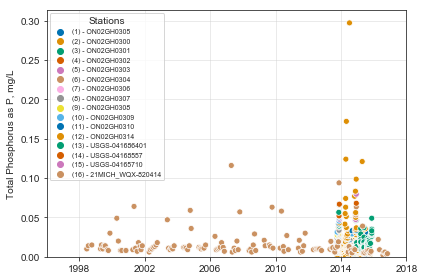

In [152]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(x='DATE', y='RESULT', data=TP, hue_order=selected_stations, hue='STATION', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Canada/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_TP.pdf')



In [153]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
      

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
STATION           &        &       &       &       &       &       &       &       \\
\midrule
ON02GH0305        &   34.0 &  0.01 &  0.01 &  0.00 &  0.01 &  0.01 &  0.01 &  0.04 \\
ON02GH0300        &  164.0 &  0.00 &  0.01 &  0.00 &  0.00 &  0.00 &  0.00 &  0.07 \\
ON02GH0301        &   34.0 &  0.02 &  0.02 &  0.00 &  0.01 &  0.01 &  0.02 &  0.07 \\
ON02GH0302        &   34.0 &  0.02 &  0.02 &  0.00 &  0.01 &  0.01 &  0.02 &  0.07 \\
ON02GH0303        &   34.0 &  0.02 &  0.02 &  0.00 &  0.01 &  0.01 &  0.02 &  0.08 \\
ON02GH0304        &   34.0 &  0.02 &  0.02 &  0.01 &  0.01 &  0.01 &  0.02 &  0.09 \\
ON02GH0306        &   32.0 &  0.01 &  0.00 &  0.01 &  0.01 &  0.01 &  0.02 &  0.03 \\
ON02GH0307        &   32.0 &  0.01 &  0.01 &  0.01 &  0.01 &  0.01 &  0.02 &  0.03 \\
ON02GH0308        &   32.0 &  0.02 &  0.01 &  0.01 &  0.01 &  0.01 &  0.02 &  0.04 \\
ON02GH0309        &  

In [154]:
selected_stations

['ON02GH0305',
 'ON02GH0300',
 'ON02GH0301',
 'ON02GH0302',
 'ON02GH0303',
 'ON02GH0304',
 'ON02GH0306',
 'ON02GH0307',
 'ON02GH0308',
 'ON02GH0309',
 'ON02GH0310',
 'ON02GH0314',
 'USGS-041686401',
 'USGS-04168557',
 'USGS-04165710',
 '21MICH_WQX-820414']

In [155]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = TP[TP.STATION.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(124, 4)

In [156]:
master_st_df.DATE = master_st_df.DATE.dt.date
# = pd.to_date(master_st_df.DATE, format="%Y-%m-%d")
# master_st_df

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [157]:
master_st_df[[
    'DATE','USGSPCode', 'RESULT']].groupby('DATE').mean().reset_index().sort_values('DATE').to_csv(
    'One_by_one/Canada/'+river+'/TP_'+river+'iver_data.csv', index=False)

### Discharge

In [91]:
river

'Detroit_R'

In [111]:
discharge = pd.read_excel('/Users/imarkelo/git/Great-Lakes-Data/measurements/ECCC/Discharge_StClair_Detroit_Niagara_Sydenhame_Thames.xlsx')



In [113]:
discharge = discharge[['DATE', 'Detroit_R']]



In [121]:
discharge['Discharge, cms'] = discharge['Detroit_R']
discharge['Date'] = discharge['DATE']
discharge['Source'] = 'ECCC'

In [122]:
# site = '02GH015'
# discharge = WSC_FLOWS[WSC_FLOWS.index>datetime.datetime(1996,1,1)][site].to_frame()

# discharge = discharge.reset_index()
# discharge = discharge.rename(index=str, columns={site:'Discharge, cms', 'index':'Date'})
# discharge['Source'] = site

discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028

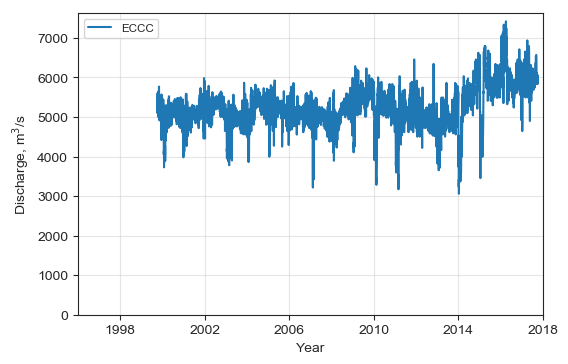

In [124]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['ECCC'], loc='best', fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Canada/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_Q.pdf')

In [125]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Canada/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### Egret

In [158]:
river

'Detroit_R'

In [159]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Sample.csv')


EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


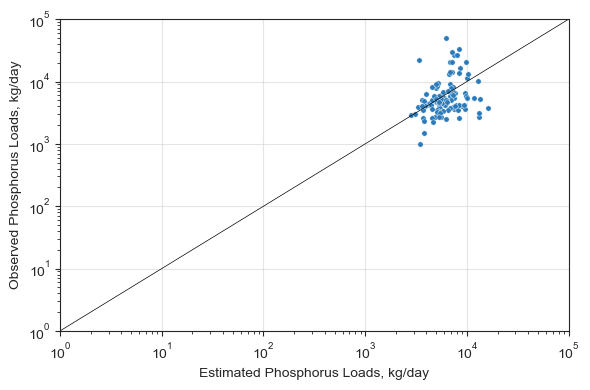

In [160]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
plt.xlim(1,100000)
plt.ylim(1,100000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_FvsF.pdf')


In [161]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,2000,183.5,5121.458472,54876.5,6.513661,183.500000,2000.248661,1803.497268,183.5,8.539225,5117.469545,5105.737929,-4.155435,0.572432,0.020516,8851.381296,0.019628,8623.863775,3230.754173,2197.441254
1,2001,549.0,5019.978384,55242.0,6.526027,183.838356,2001.248146,1815.501370,549.0,8.519904,5020.098396,5022.323997,-4.146280,0.574907,0.020034,8615.602399,0.020183,8878.990393,3144.694876,2129.686967
2,2002,914.0,5323.428858,55607.0,6.526027,183.838356,2002.248059,1827.501370,914.0,8.579181,5323.250257,5316.999987,-4.189878,0.578040,0.018970,8676.898555,0.020764,9139.784693,3167.067973,2147.867650
3,2003,1279.0,4956.833368,55972.0,6.526027,183.838356,2003.248059,1839.501370,1279.0,8.505830,4958.887602,4973.049483,-4.010224,0.581833,0.024820,10266.188251,0.021266,9365.262808,3747.158712,2609.773183
4,2004,1644.5,5186.172055,56337.5,6.513661,183.500000,2004.248661,1851.497268,1644.5,8.551688,5183.182278,5170.449144,-4.112219,0.585139,0.021274,9327.127911,0.021691,9558.444169,3404.401688,2363.843630
5,2005,2010.0,5243.132672,56703.0,6.526027,183.838356,2005.248146,1863.501370,2010.0,8.563314,5243.901798,5246.872909,-4.097741,0.592235,0.021196,9532.126281,0.022133,9822.519201,3479.226093,2432.523538
6,2006,2375.0,5130.225481,57068.0,6.526027,183.838356,2006.248059,1875.501370,2375.0,8.542154,5132.818361,5138.191306,-4.077976,0.599366,0.021846,9684.681733,0.022698,10205.294976,3534.908832,2516.711223
7,2007,2740.0,5034.580124,57433.0,6.526027,183.838356,2007.248059,1887.501370,2740.0,8.522352,5035.340158,5039.555158,-4.064681,0.601320,0.022635,9784.288998,0.023471,10681.906898,3571.265484,2556.800568
8,2008,3105.5,4994.712566,57798.5,6.513661,183.500000,2008.248661,1899.497268,3105.5,8.514302,4990.961986,4976.625853,-4.096169,0.599946,0.021493,9168.460141,0.023340,10714.773191,3346.487951,2369.499800
9,2009,3471.0,5435.440221,58164.0,6.526027,183.838356,2009.248146,1911.501370,3471.0,8.598178,5432.226835,5427.132026,-4.035297,0.596959,0.022690,10678.663329,0.021916,10092.830589,3897.712115,2731.753912


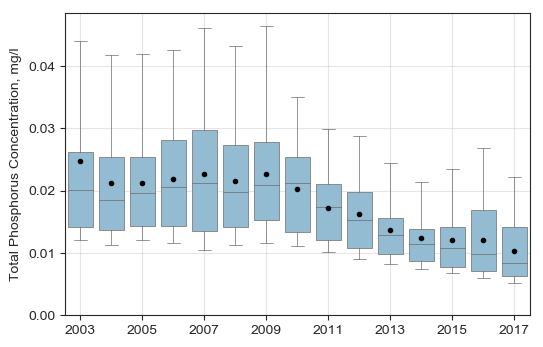

In [162]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2018))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
# plt.xlim(6.5, 18.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_PC.pdf')




In [163]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




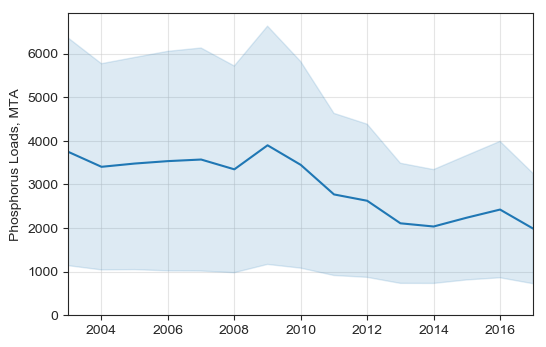

In [164]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.ylim(0,None)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_PFlux.pdf')


In [165]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2018) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrr}
\toprule
     3  &      4  &      5  &      6  &      7  &      8  &      9  &      10 &      11 &      12 &      13 &      14 &      15 &      16 &      17 \\
\midrule
 2003.0 &  2004.0 &  2005.0 &  2006.0 &  2007.0 &  2008.0 &  2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 \\
 3747.2 &  3404.4 &  3479.2 &  3534.9 &  3571.3 &  3346.5 &  3897.7 &  3448.3 &  2771.0 &  2625.6 &  2108.9 &  2035.5 &  2238.4 &  2424.0 &  1985.8 \\
 2609.8 &  2363.8 &  2432.5 &  2516.7 &  2556.8 &  2369.5 &  2731.8 &  2367.6 &  1858.7 &  1755.8 &  1377.1 &  1305.0 &  1427.8 &  1564.1 &  1262.2 \\
\bottomrule
\end{tabular}

